In [1]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

In [5]:
video_path='/home/crazypikachu/Desktop/powerplay.mp4'
audio_path='/media/crazypikachu/DATA/My stuff/Video Summarization/powerplay.wav'

In [6]:
x,sr=librosa.load(audio_path,sr=16000)
print("The length of the audio clip is {} minutes".format(librosa.get_duration(x,sr)/60))

The length of the audio clip is 23.54631145833333 minutes


# Dividing the audio into 5 parts to see variations in audio

In [7]:
split=5
window_length=split*sr

In [8]:
a=x[21*window_length:22*window_length]
ipd.Audio(a, rate=sr)

In [9]:
energy = sum(abs(a**2))
print(energy)

16124.641480222366


In [10]:
len(a)

80000

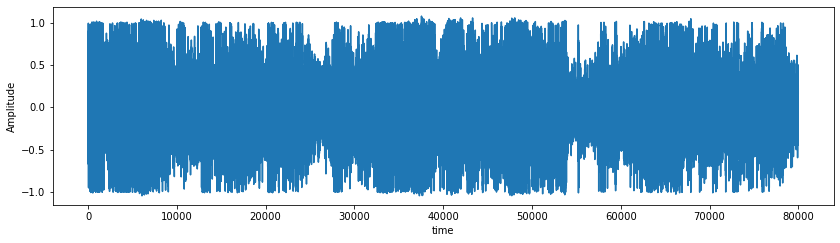

In [11]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(a)

In [12]:
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

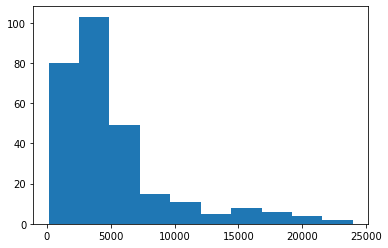

In [13]:
plt.hist(energy)
plt.show()

In [14]:
df=pd.DataFrame(columns=['energy','start','end'])

In [15]:
thresh=12000
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        i=np.where(energy == value)[0]
        df.loc[row_index,'energy']=value
        df.loc[row_index,'start']=i[0] * 5
        df.loc[row_index,'end']=(i[0]+1) * 5
        row_index= row_index + 1

In [16]:
df

energy start   end
0   16378.3    90    95
1     18190    95   100
2   21468.9   100   105
3   16124.6   105   110
4   15446.2   110   115
5   15814.7   115   120
6   12888.2   240   245
7   15368.1   875   880
8   14910.6   880   885
9   13092.3   885   890
10  12649.3   940   945
11  18737.1   945   950
12  12518.7   955   960
13  20301.6  1170  1175
14  19727.1  1175  1180
15  18940.9  1220  1225
16  22041.2  1225  1230
17  16135.4  1235  1240
18  15626.3  1240  1245
19  20348.5  1255  1260
20    23986  1260  1265
21  18237.2  1265  1270
22  13311.5  1325  1330
23  17045.1  1400  1405
24  18522.1  1405  1410

In [17]:
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
    j=i+1
    while(j<=m):
        if(df['end'][i] == df['start'][j]):
            df.loc[i,'end'] = df.loc[j,'end']
            temp.append(j)
            j=j+1
        else:
            i=j
            break

In [18]:
df.drop(temp,axis=0,inplace=True)

In [ ]:
df

In [ ]:
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
    if(i!=0):
        start_lim = start[i] - 5
    else:
        start_lim = start[i] 
    end_lim   = end[i]   
    filename= "output/"+ str(i+1) + ".mp4"
    ffmpeg_extract_subclip(video_path,start_lim,end_lim,targetname=filename)

In [ ]:
video=[]
j=0
for dir,sub,file in os.walk('output'):
    a=[int(i.split(".")[0]) for i in file]
    #print(sorted(a))
    for files in sorted(a):
        print(a)
        video_temp=VideoFileClip(os.path.join(dir,"{}.mp4".format(files)))
        video.append(video_temp)

In [ ]:
final_video= concatenate_videoclips(video)
final_video.write_videofile("final_video.mp4")
